# Data Exploration  


Goal: how many of each event type we have 

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation, PillowWriter
import os


from src.utils import *
from src.plotting import *

In [2]:
pd.set_option('display.max_columns', None)

## See what kind of variables might be nice to have

In [3]:
# "1900_02_TeamKJ_TeamB" is what I have been working with so far,
# but this is early, so it might not have the later events?

which_game = "1903_01_TeamNE_TeamA2" # "1903_01_TeamNE_TeamA2" # "1900_02_TeamKJ_TeamB"

In [4]:
game_info_df = pd.read_csv("data/game_info/game_info-" + which_game + ".csv", index_col=0)
game_info_df.head()

,game_str,home_team,away_team,at_bat,play_per_game,inning,top_bottom_inning,pitcher,catcher,first_base,second_base,third_base,shortstop,left_field,center_field,right_field,batter,first_baserunner,second_baserunner,third_baserunner
1,1903_01_TeamNE_TeamA2,TeamA2,TeamNE,1,1,1,Top,2171,2790,2526,2053,2382,1972,1557,1751,2973,4474,0,0,0
2,1903_01_TeamNE_TeamA2,TeamA2,TeamNE,1,2,1,Top,2171,2790,2526,2053,2382,1972,1557,1751,2973,4474,0,0,0
3,1903_01_TeamNE_TeamA2,TeamA2,TeamNE,1,3,1,Top,2171,2790,2526,2053,2382,1972,1557,1751,2973,4474,0,0,0
4,1903_01_TeamNE_TeamA2,TeamA2,TeamNE,1,4,1,Top,2171,2790,2526,2053,2382,1972,1557,1751,2973,4474,0,0,0
5,1903_01_TeamNE_TeamA2,TeamA2,TeamNE,1,5,1,Top,2171,2790,2526,2053,2382,1972,1557,1751,2973,4474,0,0,0


In [5]:
game_events_df = pd.read_csv("data/game_events/game_events-" + which_game + ".csv", index_col=0)
game_events_df["event"] = game_events_df["event_code"].map(lambda x: EVENT_CODE_TO_DESC[x])
game_events_df.head()

,game_str,play_id,at_bat,play_per_game,timestamp,player_position,event_code,event
1,1903_01_TeamNE_TeamA2,1,1,1,19199,1,1,pitch
2,1903_01_TeamNE_TeamA2,1,1,1,19661,2,2,ball acquired
3,1903_01_TeamNE_TeamA2,1,1,1,19661,0,5,end of play
4,1903_01_TeamNE_TeamA2,2,1,2,29858,1,1,pitch
5,1903_01_TeamNE_TeamA2,2,1,2,30320,2,2,ball acquired


### What I notice isn't there that might be nice to have:
- the at_bat field is not there for older games
- I don't think I have any outs or count
    - Not sure I can get counts
- Players speed at a given time
- Player orientation?
    - I think I could noisily infer this
- I don't think that "ball bounce" is in the older data -- how is this defined?
    - I could maybe fill this one in if z_coord is < 0.5 or something arbitrarily small?

#### Try to fill in the at_bat field

In [6]:
ball_hitting_something_df = game_events_df.loc[game_events_df["event"].isin(["ball deflection", "ball deflection off of wall", "ball bounce"]), :]

In [7]:
ball_hitting_something_df["event"].value_counts()

ball bounce                    108
ball deflection                  4
ball deflection off of wall      2
Name: event, dtype: int64

In [8]:
def add_at_bat_data(df): 
    pass

In [9]:
game_info_df.head()

,game_str,home_team,away_team,at_bat,play_per_game,inning,top_bottom_inning,pitcher,catcher,first_base,second_base,third_base,shortstop,left_field,center_field,right_field,batter,first_baserunner,second_baserunner,third_baserunner
1,1903_01_TeamNE_TeamA2,TeamA2,TeamNE,1,1,1,Top,2171,2790,2526,2053,2382,1972,1557,1751,2973,4474,0,0,0
2,1903_01_TeamNE_TeamA2,TeamA2,TeamNE,1,2,1,Top,2171,2790,2526,2053,2382,1972,1557,1751,2973,4474,0,0,0
3,1903_01_TeamNE_TeamA2,TeamA2,TeamNE,1,3,1,Top,2171,2790,2526,2053,2382,1972,1557,1751,2973,4474,0,0,0
4,1903_01_TeamNE_TeamA2,TeamA2,TeamNE,1,4,1,Top,2171,2790,2526,2053,2382,1972,1557,1751,2973,4474,0,0,0
5,1903_01_TeamNE_TeamA2,TeamA2,TeamNE,1,5,1,Top,2171,2790,2526,2053,2382,1972,1557,1751,2973,4474,0,0,0


In [10]:
# assumption: an at_bat is when the pitcher and batter are the same?
# this is wrong when a pitcher is changed mid inning

game_info_df.loc[:5, ["inning", "top_bottom_inning", "pitcher", "batter",]].groupby(["inning", "top_bottom_inning", "pitcher", "batter"]).cumcount() + 1

1    1
2    2
3    3
4    4
5    5
dtype: int64

In [11]:
grouping_cols = ["inning", "top_bottom_inning", "pitcher", "batter"]

new_game_info_df = game_info_df.copy()


new_game_info_df.loc[:10, grouping_cols]

,inning,top_bottom_inning,pitcher,batter
1,1,Top,2171,4474
2,1,Top,2171,4474
3,1,Top,2171,4474
4,1,Top,2171,4474
5,1,Top,2171,4474
6,1,Top,2171,3790
7,1,Top,2171,3790
8,1,Top,2171,3790
9,1,Top,2171,3790
10,1,Top,2171,3790


In [12]:
new_game_info_df["play_per_pa"] = new_game_info_df.loc[:, :].groupby(grouping_cols).cumcount() + 1

In [13]:
new_game_info_df["new_at_bat"] = (new_game_info_df.loc[new_game_info_df["play_per_pa"] == 1 , ["play_per_pa"]]\
.groupby("play_per_pa").cumcount() + 1)

new_game_info_df["new_at_bat"] = new_game_info_df["new_at_bat"].fillna(method='ffill', inplace=False).astype(int)

In [14]:
new_game_info_df.loc[new_game_info_df["at_bat"] + 1 == new_game_info_df["new_at_bat"], :]

,game_str,home_team,away_team,at_bat,play_per_game,inning,top_bottom_inning,pitcher,catcher,first_base,second_base,third_base,shortstop,left_field,center_field,right_field,batter,first_baserunner,second_baserunner,third_baserunner,play_per_pa,new_at_bat
101,1903_01_TeamNE_TeamA2,TeamA2,TeamNE,25,101,3,Bottom,8523,7071,5616,6993,9762,6000,3790,4474,7148,0,2053,0,0,1,26
102,1903_01_TeamNE_TeamA2,TeamA2,TeamNE,26,102,3,Bottom,8523,7071,5616,6993,9762,6000,3790,4474,7148,2526,2053,0,0,1,27
103,1903_01_TeamNE_TeamA2,TeamA2,TeamNE,26,103,3,Bottom,8523,7071,5616,6993,9762,6000,3790,4474,7148,2526,2053,0,0,2,27
104,1903_01_TeamNE_TeamA2,TeamA2,TeamNE,26,104,3,Bottom,8523,7071,5616,6993,9762,6000,3790,4474,7148,2526,2053,0,0,3,27
105,1903_01_TeamNE_TeamA2,TeamA2,TeamNE,26,105,3,Bottom,8523,7071,5616,6993,9762,6000,3790,4474,7148,2526,2053,0,0,4,27
106,1903_01_TeamNE_TeamA2,TeamA2,TeamNE,26,106,3,Bottom,8523,7071,5616,6993,9762,6000,3790,4474,7148,2526,2053,0,0,5,27
107,1903_01_TeamNE_TeamA2,TeamA2,TeamNE,26,107,3,Bottom,8523,7071,5616,6993,9762,6000,3790,4474,7148,2526,2053,0,0,6,27
108,1903_01_TeamNE_TeamA2,TeamA2,TeamNE,26,108,3,Bottom,8523,7071,5616,6993,9762,6000,3790,4474,7148,2526,2053,0,0,7,27
109,1903_01_TeamNE_TeamA2,TeamA2,TeamNE,27,109,3,Bottom,8523,7071,5616,6993,9762,6000,3790,4474,7148,1297,2053,0,0,1,28
110,1903_01_TeamNE_TeamA2,TeamA2,TeamNE,28,110,3,Bottom,8523,7071,5616,6993,9762,6000,3790,4474,7148,2790,2053,0,0,1,29


In [15]:
## something happens at play 101, where a batter is awarded first with no batter? I think this is a IBB or HBP?

new_game_info_df.loc[98:105, :]

,game_str,home_team,away_team,at_bat,play_per_game,inning,top_bottom_inning,pitcher,catcher,first_base,second_base,third_base,shortstop,left_field,center_field,right_field,batter,first_baserunner,second_baserunner,third_baserunner,play_per_pa,new_at_bat
98,1903_01_TeamNE_TeamA2,TeamA2,TeamNE,25,98,3,Bottom,8523,7071,5616,6993,9762,6000,3790,4474,7148,2053,0,0,0,4,25
99,1903_01_TeamNE_TeamA2,TeamA2,TeamNE,25,99,3,Bottom,8523,7071,5616,6993,9762,6000,3790,4474,7148,2053,0,0,0,5,25
100,1903_01_TeamNE_TeamA2,TeamA2,TeamNE,25,100,3,Bottom,8523,7071,5616,6993,9762,6000,3790,4474,7148,2053,0,0,0,6,25
101,1903_01_TeamNE_TeamA2,TeamA2,TeamNE,25,101,3,Bottom,8523,7071,5616,6993,9762,6000,3790,4474,7148,0,2053,0,0,1,26
102,1903_01_TeamNE_TeamA2,TeamA2,TeamNE,26,102,3,Bottom,8523,7071,5616,6993,9762,6000,3790,4474,7148,2526,2053,0,0,1,27
103,1903_01_TeamNE_TeamA2,TeamA2,TeamNE,26,103,3,Bottom,8523,7071,5616,6993,9762,6000,3790,4474,7148,2526,2053,0,0,2,27
104,1903_01_TeamNE_TeamA2,TeamA2,TeamNE,26,104,3,Bottom,8523,7071,5616,6993,9762,6000,3790,4474,7148,2526,2053,0,0,3,27
105,1903_01_TeamNE_TeamA2,TeamA2,TeamNE,26,105,3,Bottom,8523,7071,5616,6993,9762,6000,3790,4474,7148,2526,2053,0,0,4,27


In [16]:
game_events_df.loc[game_events_df["play_per_game"] == 101, :]

,game_str,play_id,at_bat,play_per_game,timestamp,player_position,event_code,event
377,1903_01_TeamNE_TeamA2,101,25,101,3174299,1,1,pitch
378,1903_01_TeamNE_TeamA2,101,25,101,3174761,0,5,end of play
379,1903_01_TeamNE_TeamA2,101,25,101,3174761,2,2,ball acquired


In [17]:
new_game_info_df.loc[new_game_info_df["at_bat"] + 2 == new_game_info_df["new_at_bat"], :]

,game_str,home_team,away_team,at_bat,play_per_game,inning,top_bottom_inning,pitcher,catcher,first_base,second_base,third_base,shortstop,left_field,center_field,right_field,batter,first_baserunner,second_baserunner,third_baserunner,play_per_pa,new_at_bat
159,1903_01_TeamNE_TeamA2,TeamA2,TeamNE,42,160,5,Top,2171,2790,2526,2053,2382,1972,1557,1751,2973,0,6000,0,0,1,44
160,1903_01_TeamNE_TeamA2,TeamA2,TeamNE,42,161,5,Top,2171,2790,2526,2053,2382,1972,1557,1751,2973,0,6000,0,0,2,44
161,1903_01_TeamNE_TeamA2,TeamA2,TeamNE,42,162,5,Top,2171,2790,2526,2053,2382,1972,1557,1751,2973,0,6000,0,0,3,44
162,1903_01_TeamNE_TeamA2,TeamA2,TeamNE,43,163,5,Top,2171,2790,2526,2053,2382,1972,1557,1751,2973,7071,6000,0,0,1,45
163,1903_01_TeamNE_TeamA2,TeamA2,TeamNE,43,164,5,Top,2171,2790,2526,2053,2382,1972,1557,1751,2973,7071,6000,0,0,2,45
164,1903_01_TeamNE_TeamA2,TeamA2,TeamNE,43,165,5,Top,2171,2790,2526,2053,2382,1972,1557,1751,2973,7071,6000,0,0,3,45
165,1903_01_TeamNE_TeamA2,TeamA2,TeamNE,43,166,5,Top,2171,2790,2526,2053,2382,1972,1557,1751,2973,7071,6000,0,0,4,45
166,1903_01_TeamNE_TeamA2,TeamA2,TeamNE,43,167,5,Top,2171,2790,2526,2053,2382,1972,1557,1751,2973,7071,6000,0,0,5,45
167,1903_01_TeamNE_TeamA2,TeamA2,TeamNE,43,168,5,Top,2171,2790,2526,2053,2382,1972,1557,1751,2973,7071,6000,0,0,6,45
168,1903_01_TeamNE_TeamA2,TeamA2,TeamNE,43,169,5,Top,2171,2790,2526,2053,2382,1972,1557,1751,2973,7071,6000,0,0,7,45


In [18]:
# Something weird also happens at play id 160 and 202

new_game_info_df.loc[158:162, :]

,game_str,home_team,away_team,at_bat,play_per_game,inning,top_bottom_inning,pitcher,catcher,first_base,second_base,third_base,shortstop,left_field,center_field,right_field,batter,first_baserunner,second_baserunner,third_baserunner,play_per_pa,new_at_bat
158,1903_01_TeamNE_TeamA2,TeamA2,TeamNE,42,159,5,Top,2171,2790,2526,2053,2382,1972,1557,1751,2973,6000,0,0,0,1,43
159,1903_01_TeamNE_TeamA2,TeamA2,TeamNE,42,160,5,Top,2171,2790,2526,2053,2382,1972,1557,1751,2973,0,6000,0,0,1,44
160,1903_01_TeamNE_TeamA2,TeamA2,TeamNE,42,161,5,Top,2171,2790,2526,2053,2382,1972,1557,1751,2973,0,6000,0,0,2,44
161,1903_01_TeamNE_TeamA2,TeamA2,TeamNE,42,162,5,Top,2171,2790,2526,2053,2382,1972,1557,1751,2973,0,6000,0,0,3,44
162,1903_01_TeamNE_TeamA2,TeamA2,TeamNE,43,163,5,Top,2171,2790,2526,2053,2382,1972,1557,1751,2973,7071,6000,0,0,1,45


In [19]:
# gotta be honest, I am a bit confused by this one -- there are several plays in a row, where the 
# events show a pitch, but the game info doesn't show a batter?
game_events_df.loc[game_events_df["play_per_game"] == 162, :]

,game_str,play_id,at_bat,play_per_game,timestamp,player_position,event_code,event
628,1903_01_TeamNE_TeamA2,162,42,162,5417378,1,1,pitch
629,1903_01_TeamNE_TeamA2,162,42,162,5417807,10,4,ball hit into play
630,1903_01_TeamNE_TeamA2,162,42,162,5419655,255,16,ball bounce
631,1903_01_TeamNE_TeamA2,162,42,162,5420546,255,16,ball bounce
632,1903_01_TeamNE_TeamA2,162,42,162,5421140,255,16,ball bounce
633,1903_01_TeamNE_TeamA2,162,42,162,5421635,255,16,ball bounce
634,1903_01_TeamNE_TeamA2,162,42,162,5422130,8,2,ball acquired
635,1903_01_TeamNE_TeamA2,162,42,162,5423549,8,3,throw (ball-in-play)
636,1903_01_TeamNE_TeamA2,162,42,162,5425166,6,2,ball acquired
637,1903_01_TeamNE_TeamA2,162,42,162,5425892,0,5,end of play


In [29]:
game_info_df.loc[200:205, :]

,game_str,home_team,away_team,at_bat,play_per_game,inning,top_bottom_inning,pitcher,catcher,first_base,second_base,third_base,shortstop,left_field,center_field,right_field,batter,first_baserunner,second_baserunner,third_baserunner
200,1903_01_TeamNE_TeamA2,TeamA2,TeamNE,51,201,6,Top,2171,2790,2526,2053,2382,1972,1557,1751,2973,6803,9762,0,0
201,1903_01_TeamNE_TeamA2,TeamA2,TeamNE,51,202,6,Top,2171,2790,2526,2053,2382,1972,1557,1751,2973,6803,9762,0,0
202,1903_01_TeamNE_TeamA2,TeamA2,TeamNE,51,203,6,Top,2171,2790,2526,2053,2382,1972,1557,1751,2973,0,0,6803,9762
203,1903_01_TeamNE_TeamA2,TeamA2,TeamNE,52,204,6,Top,2171,2790,2526,2053,2382,1972,1557,1751,2973,5616,0,6803,9762
204,1903_01_TeamNE_TeamA2,TeamA2,TeamNE,53,205,6,Top,2171,2790,2526,2053,2382,1972,1557,1751,2973,6993,0,5616,0
205,1903_01_TeamNE_TeamA2,TeamA2,TeamNE,53,206,6,Top,2171,2790,2526,2053,2382,1972,1557,1751,2973,6993,0,5616,0


In [20]:
new_game_info_df.loc[200:205, :]

,game_str,home_team,away_team,at_bat,play_per_game,inning,top_bottom_inning,pitcher,catcher,first_base,second_base,third_base,shortstop,left_field,center_field,right_field,batter,first_baserunner,second_baserunner,third_baserunner,play_per_pa,new_at_bat
200,1903_01_TeamNE_TeamA2,TeamA2,TeamNE,51,201,6,Top,2171,2790,2526,2053,2382,1972,1557,1751,2973,6803,9762,0,0,1,53
201,1903_01_TeamNE_TeamA2,TeamA2,TeamNE,51,202,6,Top,2171,2790,2526,2053,2382,1972,1557,1751,2973,6803,9762,0,0,2,53
202,1903_01_TeamNE_TeamA2,TeamA2,TeamNE,51,203,6,Top,2171,2790,2526,2053,2382,1972,1557,1751,2973,0,0,6803,9762,1,54
203,1903_01_TeamNE_TeamA2,TeamA2,TeamNE,52,204,6,Top,2171,2790,2526,2053,2382,1972,1557,1751,2973,5616,0,6803,9762,1,55
204,1903_01_TeamNE_TeamA2,TeamA2,TeamNE,53,205,6,Top,2171,2790,2526,2053,2382,1972,1557,1751,2973,6993,0,5616,0,1,56
205,1903_01_TeamNE_TeamA2,TeamA2,TeamNE,53,206,6,Top,2171,2790,2526,2053,2382,1972,1557,1751,2973,6993,0,5616,0,2,56


In [24]:
game_events_df.loc[game_events_df["play_per_game"] == 202, :]

,game_str,play_id,at_bat,play_per_game,timestamp,player_position,event_code,event
771,1903_01_TeamNE_TeamA2,202,51,202,6570927,1,1,pitch
772,1903_01_TeamNE_TeamA2,202,51,202,6571389,2,2,ball acquired
773,1903_01_TeamNE_TeamA2,202,51,202,6571389,0,5,end of play


In [21]:
# I am a bit confused by this one as well -- this one has a play which shows the batter and runner on first both advance?
# so is that like a dropped 3rd that kicks around the backstop?

game_events_df.loc[game_events_df["play_per_game"] == 203, :]

,game_str,play_id,at_bat,play_per_game,timestamp,player_position,event_code,event
774,1903_01_TeamNE_TeamA2,203,51,203,6587493,1,1,pitch
775,1903_01_TeamNE_TeamA2,203,51,203,6587922,10,4,ball hit into play
776,1903_01_TeamNE_TeamA2,203,51,203,6587955,255,16,ball bounce
777,1903_01_TeamNE_TeamA2,203,51,203,6589638,255,16,ball bounce
778,1903_01_TeamNE_TeamA2,203,51,203,6590133,5,2,ball acquired
779,1903_01_TeamNE_TeamA2,203,51,203,6591420,5,3,throw (ball-in-play)
780,1903_01_TeamNE_TeamA2,203,51,203,6592872,255,16,ball bounce
781,1903_01_TeamNE_TeamA2,203,51,203,6595314,0,5,end of play


In [22]:
# gotta be honest, I am a bit confused by this one -- there are several plays in a row, where the 
# events show a pitch, but the game info doesn't show a batter?
game_events_df.loc[game_events_df["play_per_game"] == 203, :]

,game_str,play_id,at_bat,play_per_game,timestamp,player_position,event_code,event
774,1903_01_TeamNE_TeamA2,203,51,203,6587493,1,1,pitch
775,1903_01_TeamNE_TeamA2,203,51,203,6587922,10,4,ball hit into play
776,1903_01_TeamNE_TeamA2,203,51,203,6587955,255,16,ball bounce
777,1903_01_TeamNE_TeamA2,203,51,203,6589638,255,16,ball bounce
778,1903_01_TeamNE_TeamA2,203,51,203,6590133,5,2,ball acquired
779,1903_01_TeamNE_TeamA2,203,51,203,6591420,5,3,throw (ball-in-play)
780,1903_01_TeamNE_TeamA2,203,51,203,6592872,255,16,ball bounce
781,1903_01_TeamNE_TeamA2,203,51,203,6595314,0,5,end of play


In [23]:
new_game_info_df.loc[new_game_info_df["at_bat"] + 3 == new_game_info_df["new_at_bat"], :]

,game_str,home_team,away_team,at_bat,play_per_game,inning,top_bottom_inning,pitcher,catcher,first_base,second_base,third_base,shortstop,left_field,center_field,right_field,batter,first_baserunner,second_baserunner,third_baserunner,play_per_pa,new_at_bat
202,1903_01_TeamNE_TeamA2,TeamA2,TeamNE,51,203,6,Top,2171,2790,2526,2053,2382,1972,1557,1751,2973,0,0,6803,9762,1,54
203,1903_01_TeamNE_TeamA2,TeamA2,TeamNE,52,204,6,Top,2171,2790,2526,2053,2382,1972,1557,1751,2973,5616,0,6803,9762,1,55
204,1903_01_TeamNE_TeamA2,TeamA2,TeamNE,53,205,6,Top,2171,2790,2526,2053,2382,1972,1557,1751,2973,6993,0,5616,0,1,56
205,1903_01_TeamNE_TeamA2,TeamA2,TeamNE,53,206,6,Top,2171,2790,2526,2053,2382,1972,1557,1751,2973,6993,0,5616,0,2,56
206,1903_01_TeamNE_TeamA2,TeamA2,TeamNE,54,207,6,Top,2171,2790,2526,2053,2382,1972,1557,1751,2973,6000,0,5616,0,1,57
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
319,1903_01_TeamNE_TeamA2,TeamA2,TeamNE,82,323,9,Top,2592,2790,2526,2053,2382,1972,1557,1751,2973,9762,0,3790,0,4,85
320,1903_01_TeamNE_TeamA2,TeamA2,TeamNE,83,324,9,Top,2592,2790,2526,2053,2382,1972,1557,1751,2973,6803,0,3790,0,1,86
321,1903_01_TeamNE_TeamA2,TeamA2,TeamNE,83,325,9,Top,2592,2790,2526,2053,2382,1972,1557,1751,2973,6803,0,3790,0,2,86
322,1903_01_TeamNE_TeamA2,TeamA2,TeamNE,83,326,9,Top,2592,2790,2526,2053,2382,1972,1557,1751,2973,6803,0,3790,0,3,86


#### Use at_bat field to fill in outs?

- double check me on that

### What are the most common events?
- Corollary: when were they added?

In [24]:
# These figures aren't all that useful as they stand honestly

In [25]:
game_events_monitoring = pd.DataFrame()

root_dirs = ['data/game_events/'] 


for root_dir in root_dirs:
    for sub_dir, dirs, files in os.walk(root_dir):
        for file in files:
            if "checkpoint" in file:
                continue
            
            temp_game_events_df = pd.read_csv(os.path.join(sub_dir, file), index_col=0)
            temp_game_events_df["event"] = temp_game_events_df["event_code"].map(lambda x: EVENT_CODE_TO_DESC[x])
            
            temp_df = pd.DataFrame(temp_game_events_df["event"].value_counts(normalize=True))
            
            # take just the first part
            temp_df["game"] = file.split(".csv")[0]
            
            temp_df = temp_df.reset_index(drop=False)
            
            game_events_monitoring = pd.concat([game_events_monitoring, temp_df])

            
game_events_monitoring = game_events_monitoring.reset_index()                


In [26]:
# some plots by game might be useful here, or like a little dashboard or something 

In [27]:
game_events_monitoring

,level_0,index,event,game
0,0,ball acquired,0.262321,game_events-1903_01_TeamNE_TeamA2
1,1,end of play,0.259141,game_events-1903_01_TeamNE_TeamA2
2,2,pitch,0.252782,game_events-1903_01_TeamNE_TeamA2
3,3,ball bounce,0.085851,game_events-1903_01_TeamNE_TeamA2
4,4,ball hit into play,0.081876,game_events-1903_01_TeamNE_TeamA2
...,...,...,...,...
912,5,throw (ball-in-play),0.023038,game_events-1902_31_TeamMF_TeamA2
913,6,home run,0.004266,game_events-1902_31_TeamMF_TeamA2
914,7,ball deflection,0.002560,game_events-1902_31_TeamMF_TeamA2
915,8,ball deflection off of wall,0.001706,game_events-1902_31_TeamMF_TeamA2


In [28]:
game_events_monitoring_df = game_events_monitoring.pivot(index='game', columns="index", values="event").sort_index()

In [29]:
game_events_monitoring_df = game_events_monitoring_df.reset_index()

game_events_monitoring_df["away"] = game_events_monitoring_df["game"].str.split("_Team").apply(lambda x: x[1])
game_events_monitoring_df["home"] = game_events_monitoring_df["game"].str.split("_Team").apply(lambda x: x[-1])

game_events_monitoring_df["year"] = game_events_monitoring_df["game"].str.strip("game_events-").str.split("_").apply(lambda x: x[0])
game_events_monitoring_df["game_num"] = game_events_monitoring_df["game"].str.strip("game_events-").str.split("_").apply(lambda x: x[1])

# game_events_monitoring_df = game_events_monitoring_df.set_index('game')

(array([ 40.,  50.,  60.,  70.,  80.,  90., 100.]),
 [Text(40.0, 0, '40'),
  Text(50.0, 0, '50'),
  Text(60.0, 0, '60'),
  Text(70.0, 0, '70'),
  Text(80.0, 0, '80'),
  Text(90.0, 0, '90'),
  Text(100.0, 0, '100')])

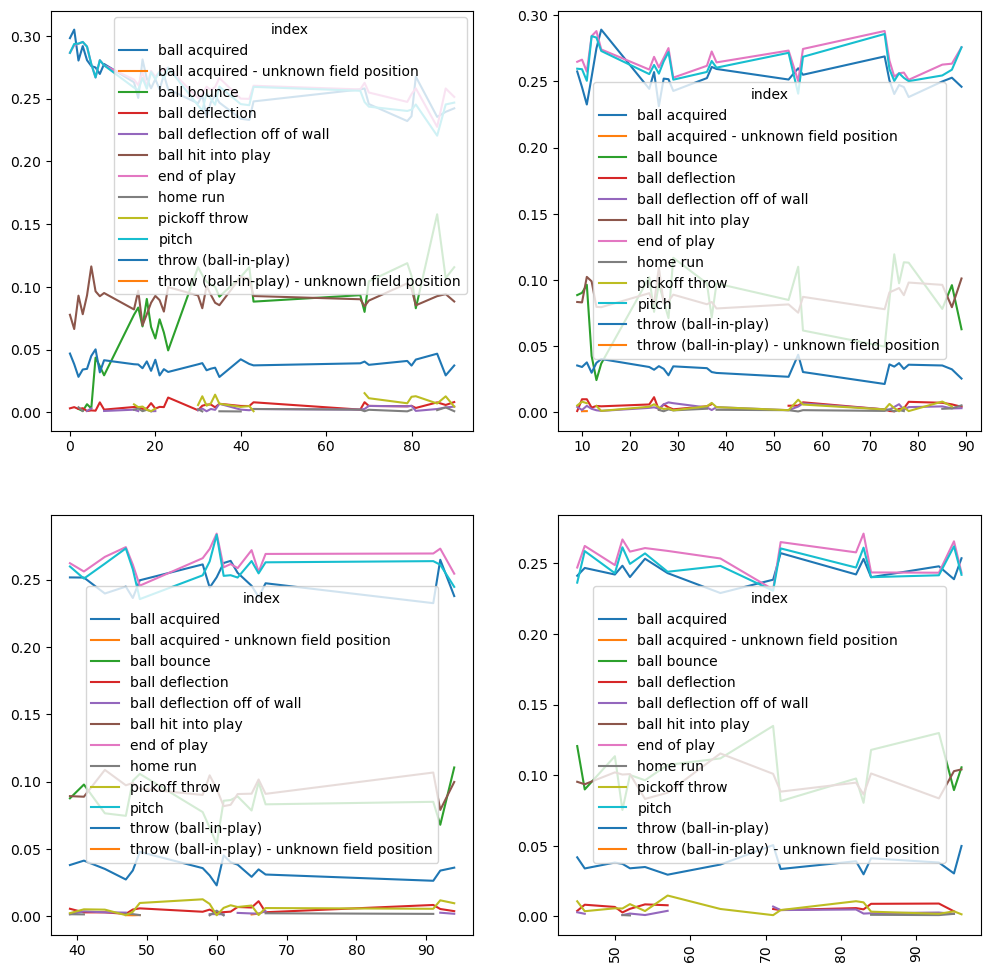

In [30]:
fig, ax = plt.subplots(ncols=2, nrows=2, figsize=(12,12))

i =0
for team in ['B', 'A3', 'A2', 'A1']:
    
    lines = game_events_monitoring_df.loc[game_events_monitoring_df["home"] == team, :].plot(kind = "line", ax=ax[i // 2][i % 2])
    
    i += 1

plt.xticks(rotation=90)

(array([-1.,  0.,  1.,  2.,  3.,  4.,  5.,  6.,  7.,  8.,  9.]),
 [Text(-1.0, 0, '27'),
  Text(0.0, 0, '13'),
  Text(1.0, 0, '14'),
  Text(2.0, 0, '15'),
  Text(3.0, 0, '16'),
  Text(4.0, 0, '17'),
  Text(5.0, 0, '18'),
  Text(6.0, 0, '25'),
  Text(7.0, 0, '26'),
  Text(8.0, 0, '27'),
  Text(9.0, 0, '')])

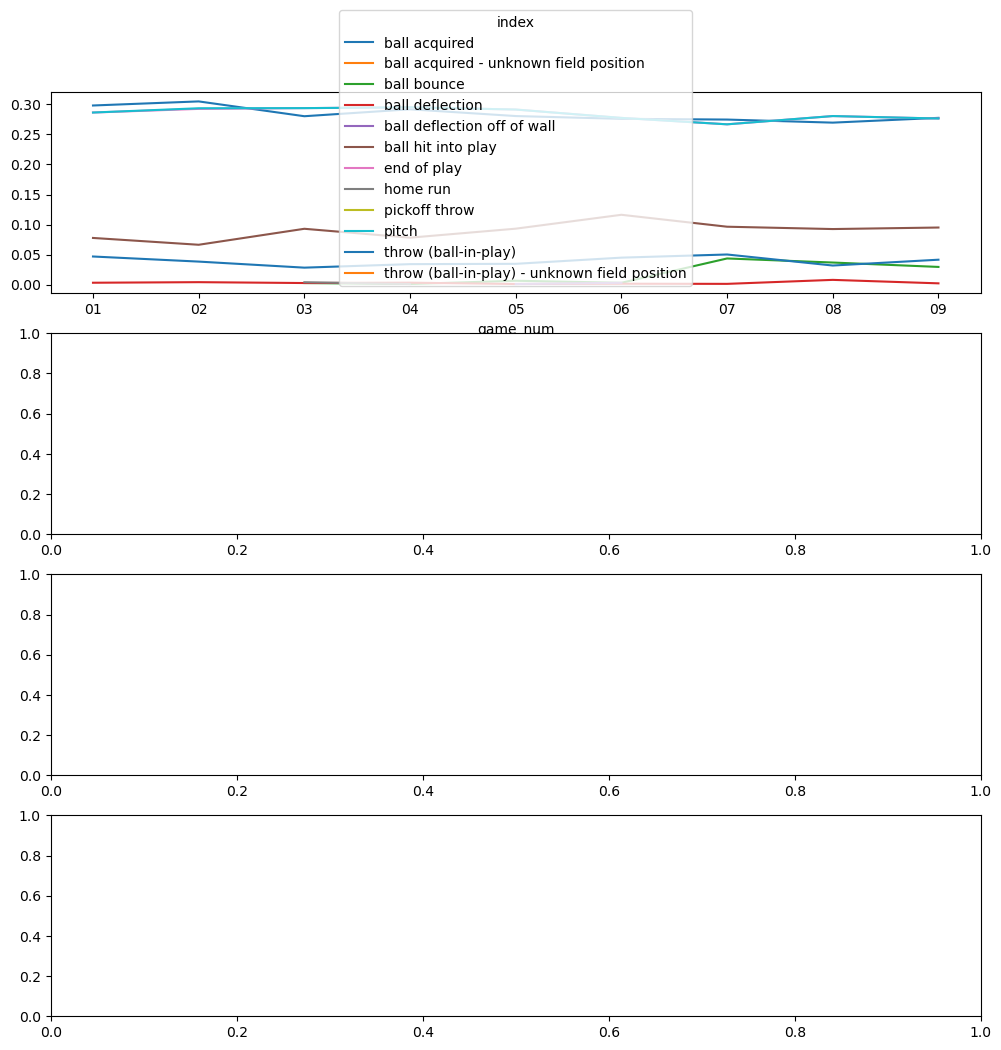

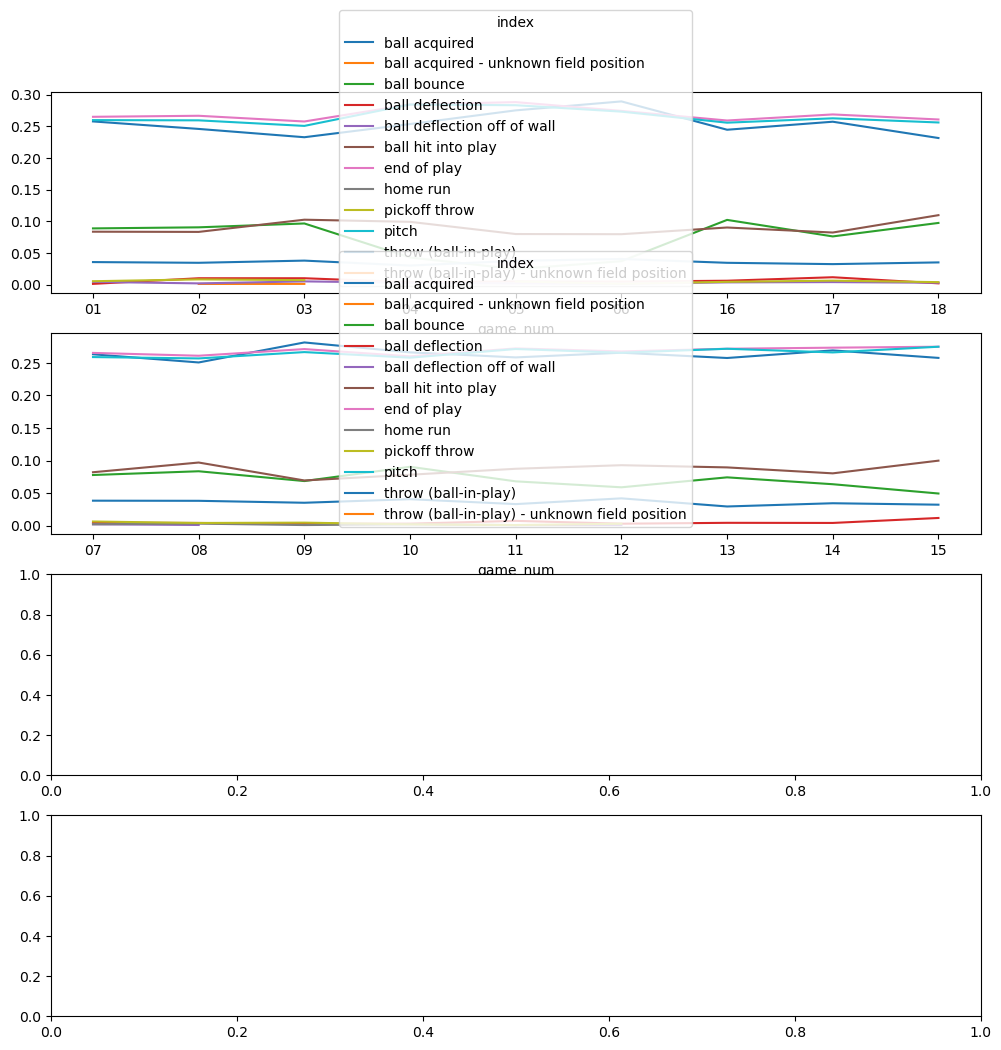

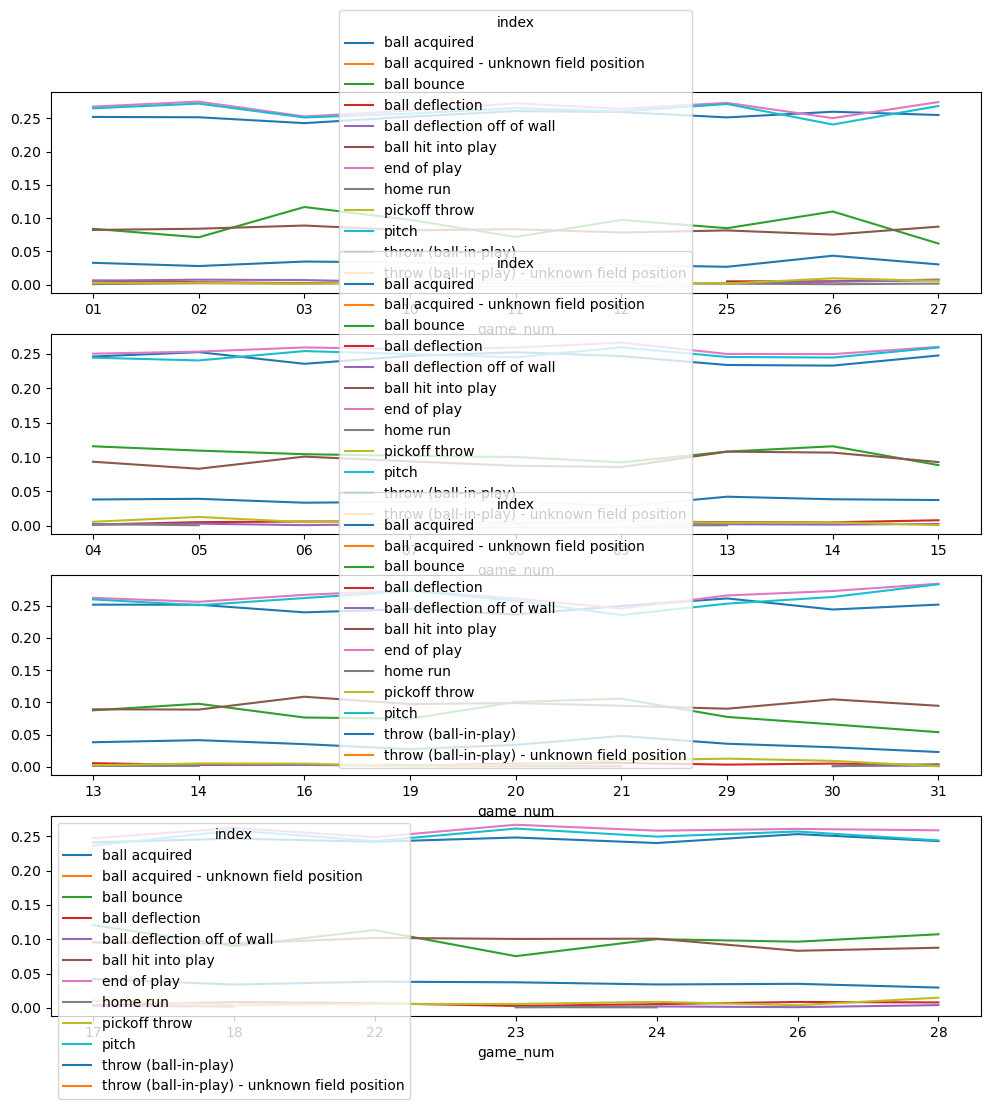

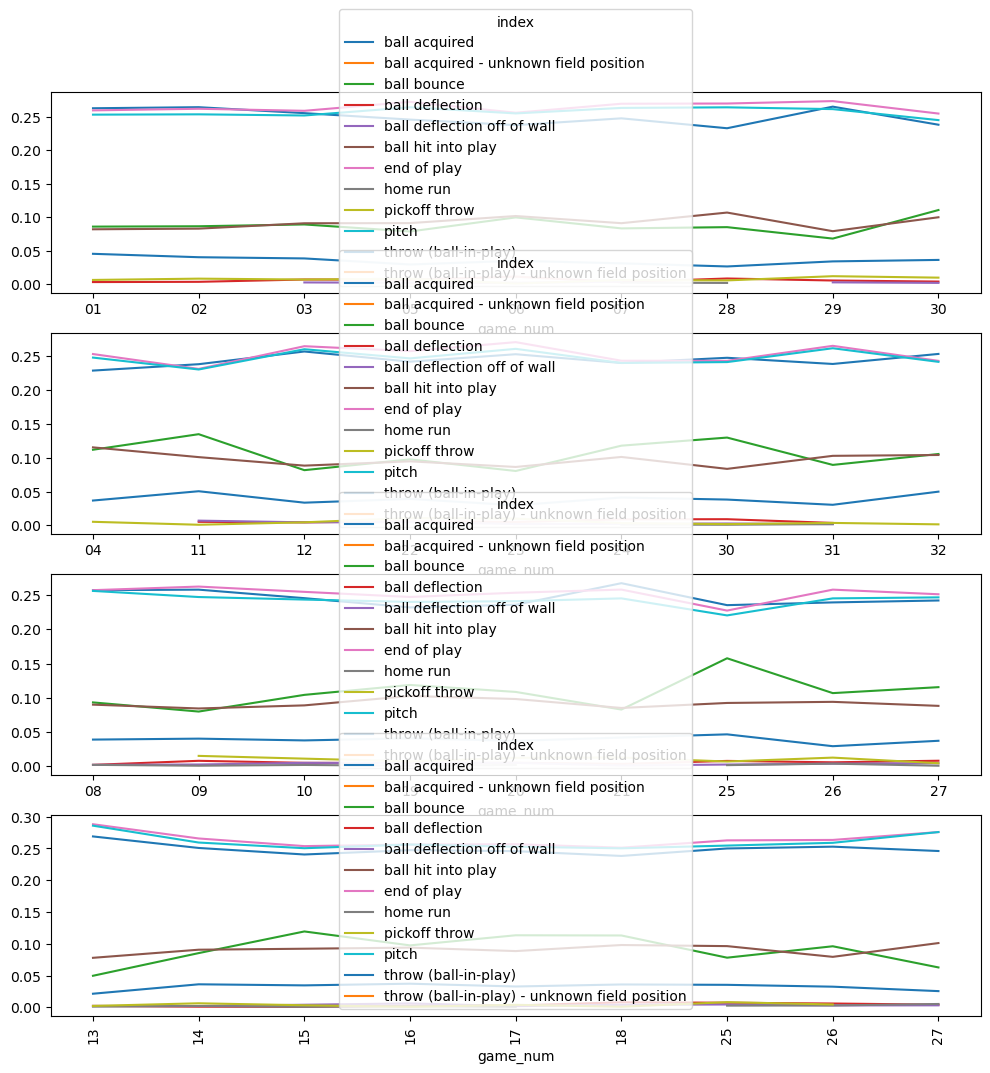

In [31]:
for year in ["1900", "1901", "1902", "1903"]:
    i = 0
    
    this_year = game_events_monitoring_df.loc[(game_events_monitoring_df["year"] == year), :]
    this_year_teams = this_year["home"].unique()
    
    fig, ax = plt.subplots(nrows=4 , figsize=(12,12))

    for team in this_year["home"].unique():

        plot_df = game_events_monitoring_df.loc[(game_events_monitoring_df["home"] == team) & (game_events_monitoring_df["year"] == year), :]
        
        
        plot_df.plot(kind = "line", x="game_num", ax=ax[i])

        i += 1

plt.xticks(rotation=90)

### How many throws does each player(/position) make?

In [32]:
all_game_events = concat_game_events_into_single_file(write=False)

In [33]:
all_game_events.head()

,game_str,play_id,at_bat,play_per_game,timestamp,player_position,event_code,last_event_code,last_player_position,event,last_event,game,away,home,year,game_num
1,1903_01_TeamNE_TeamA2,1,1.0,1,19199,1,1,NaN,NaN,pitch,NaN,game_events-1903_01_TeamNE_TeamA2,NE,A2,1903,01
2,1903_01_TeamNE_TeamA2,1,1.0,1,19661,2,2,1.0,1.0,ball acquired,pitch,game_events-1903_01_TeamNE_TeamA2,NE,A2,1903,01
3,1903_01_TeamNE_TeamA2,1,1.0,1,19661,0,5,2.0,2.0,end of play,ball acquired,game_events-1903_01_TeamNE_TeamA2,NE,A2,1903,01
4,1903_01_TeamNE_TeamA2,2,1.0,2,29858,1,1,5.0,0.0,pitch,end of play,game_events-1903_01_TeamNE_TeamA2,NE,A2,1903,01
5,1903_01_TeamNE_TeamA2,2,1.0,2,30320,2,2,1.0,1.0,ball acquired,pitch,game_events-1903_01_TeamNE_TeamA2,NE,A2,1903,01


In [34]:
all_game_events["event"].value_counts()

end of play                                      27244
pitch                                            26704
ball acquired                                    26089
ball hit into play                                9427
ball bounce                                       8818
throw (ball-in-play)                              3698
pickoff throw                                      543
ball deflection                                    518
ball deflection off of wall                        270
home run                                           112
ball acquired - unknown field position              18
throw (ball-in-play) - unknown field position        3
Name: event, dtype: int64

(1363, 16)


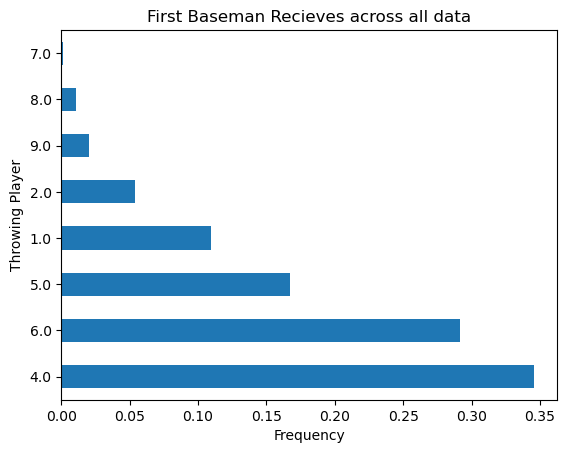

In [35]:
group_by_cols = ["player_position", "event"]


first_base_receives = all_game_events.loc[(all_game_events["event"] == "ball acquired") &\
                                      (all_game_events["player_position"] == 3)&\
                                      (all_game_events["last_event"] == "throw (ball-in-play)"), :]

first_base_receives.loc[:, "last_player_position"].value_counts(normalize = True).plot(kind="barh", title="First Baseman Recieves across all data")

plt.ylabel("Throwing Player")
plt.xlabel("Frequency")

print(first_base_receives.shape)



In [36]:
game_events_df["last_event_code"] = game_events_df["event_code"].shift(1)

In [37]:
game_events_df["last_player_position"] = game_events_df["player_position"].shift(1)

In [38]:
game_events_df["last_event"] = game_events_df["last_event_code"].map(lambda x: EVENT_CODE_TO_DESC[x] if pd.notnull(x) else x)

In [39]:
this_game_first_base_acqs = game_events_df.loc[(game_events_df["event"] == "ball acquired") &\
                                               (game_events_df["player_position"] == 3) &\
                                               (game_events_df["last_event"] == "throw (ball-in-play)")
                                               , :]

In [40]:
this_game_first_base_acqs.shape[0]

16

### How often is the ball acquired by each player?